# Advanced Classification Predict Student Solution

© Explore Data Science Academy​ TeamNM2

<img src="https://cdn-images-1.medium.com/max/1600/1*_QGyIwpgq831xI54cIe_GQ.jpeg" style="width: 500px;"/>

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ridwa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## 3.2 What is Natural Language Processing?

Natural language is the language that humans speak and understand. It could be Hindi, English, Spanish, etc.Natural language processing (NLP) is process whereby computers are programmed to process and analyse large amounts of natural language data, which can be in the form of text or audio. Example of applications that use NLP include Google Voice assistant, Siri and google translator amongs others.

<a href=#cont>Back to Table of Contents</a>

In [1]:
# Libraries for data loading and data visulisation
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Libraries for modelling
#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.utils import resample

#Model Evaluations
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import plot_roc_curve
# Natural language Toolkit packages.
# Necessary libraries and modules that are 
# going to help us do the data processing 
# from the nltk library.
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
import string
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from sklearn.utils import resample
# Save trained models
import pickle
# Customise our plotting settings
sns.set_style('whitegrid')

#Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
import itertools # confusion matrix

In [6]:
#load the training and test data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')

In [7]:
train.head()

,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504


In [8]:
# Dropping the "tweetid" columns in both train and test datasets 
df_train = train.drop(['tweetid'], axis=1)
df_test = test.drop(['tweetid'], axis=1)

# Storing the "tweetid" of the test dataset in a separate dataframe
# so that we can append it to our final submission dataset.
test_id = pd.DataFrame(test['tweetid'])
df_train.head()

,sentiment,message
0,-1,RT @darreljorstad: Funny as hell! Canada deman...
1,-1,All the biggest lies about climate change and ...
2,-1,The Coming Revelation Of The $q$Global Warming...
3,-1,RT @DineshDSouza: Let's see if the world ends ...
4,-1,RT @SteveSGoddard: Obama has no control over t...


In [9]:
# View the newly separated dataframe of the test dataframe 
test_id.head()

,tweetid
0,8.978530e+17
1,9.250470e+17
2,6.963540e+17
3,8.468070e+17
4,6.280850e+17


In [16]:
#df_train['len'] = df_train['message'].str.len()
#df_train.head(10)

<a id="six"></a>
# 6. EXPLORATORY DATA ANALYSIS (EDA) <img src="https://i.ytimg.com/vi/pKsGE7wqQks/maxresdefault.jpg"  style="width: 400px;"/>
<a href=#cont>Back to Table of Contents</a>

In [17]:
# Look at stats
# df.info, df.describe, df.isnull, etc

## 6.1 Data Exploration

In [10]:
df_train.columns # Check the columns

Index(['sentiment', 'message'], dtype='object')

In [11]:
df_train.shape  # Check for the numbers of rows and colums in the dataset

(30759, 2)

In [12]:
df_train.info() #Get more informatioin of the various data types contained in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30759 entries, 0 to 30758
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  30759 non-null  int64 
 1   message    30759 non-null  object
dtypes: int64(1), object(1)
memory usage: 480.7+ KB


In [13]:
#Check for missing values in the dataset
df_train.isnull().sum()

sentiment    0
message      0
dtype: int64

In [14]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,30759.0,0.853929,0.853551,-1.0,0.0,1.0,1.0,2.0


In [15]:
df_train.describe(include='object').T

,count,unique,top,freq
message,30759,28813,RT @StephenSchlegel: she's thinking about how ...,361


In [16]:
#checking for unique values 
df_train['sentiment'].value_counts()


 1    16073
 2     6493
 0     5400
-1     2793
Name: sentiment, dtype: int64

In [17]:
#Check uniques target values
df_train['sentiment'].unique()

array([-1,  0,  1,  2], dtype=int64)

In [18]:
#taking a closer look at the message column
df_train['message'] = df_train.message.str.lower()
df_train['message']

0        rt @darreljorstad: funny as hell! canada deman...
1        all the biggest lies about climate change and ...
2        the coming revelation of the $q$global warming...
3        rt @dineshdsouza: let's see if the world ends ...
4        rt @stevesgoddard: obama has no control over t...
                               ...                        
30754    rt @time: the pentagon warned that climate cha...
30755    study finds that global warming exacerbates re...
30756    rt @mikeyslezak: the global green movement pre...
30757    rt @profedwardsnz: nyc mayor says ny will go f...
30758    rt sanders: climate change causes terrorism  h...
Name: message, Length: 30759, dtype: object

<a href=#cont>Back to Table of Contents</a>

## 6.2 Data Visualization of Target Variables
Plotting the distributions of the dataset in different ways.

<AxesSubplot:ylabel='sentiment'>

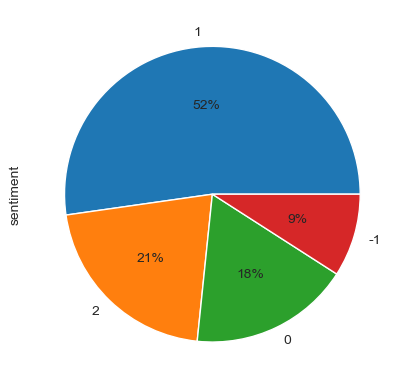

In [19]:
# Before balancing our data
#Pie chart
df_train['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

Above its observed In the "sentiment" column it was observed that 54% of tweets was 1, 23%was 2, 15% was 0 and 8% was -1.

Below its oserved that in the sentiment column has pro: 8530, anti: 1296, neutral: 2353, news: 3640 tweets

DATA DICTIONARY:

2 News: the tweet links to factual news about climate change

1 Pro: the tweet supports the belief of man-made climate change

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

-1 Anti: the tweet does not believe in man-made climate change

In [20]:
pro= df_train[df_train['sentiment'] == 1]
anti = df_train[df_train['sentiment'] == -1]
neutral = df_train[df_train['sentiment'] == 0]
news = df_train[df_train['sentiment'] == 2]

print('pro:' ,len(pro),'\nanti:',len(anti), '\nneutral:', len(neutral), '\nnews:', len(news))

pro: 16073 
anti: 2793 
neutral: 5400 
news: 6493


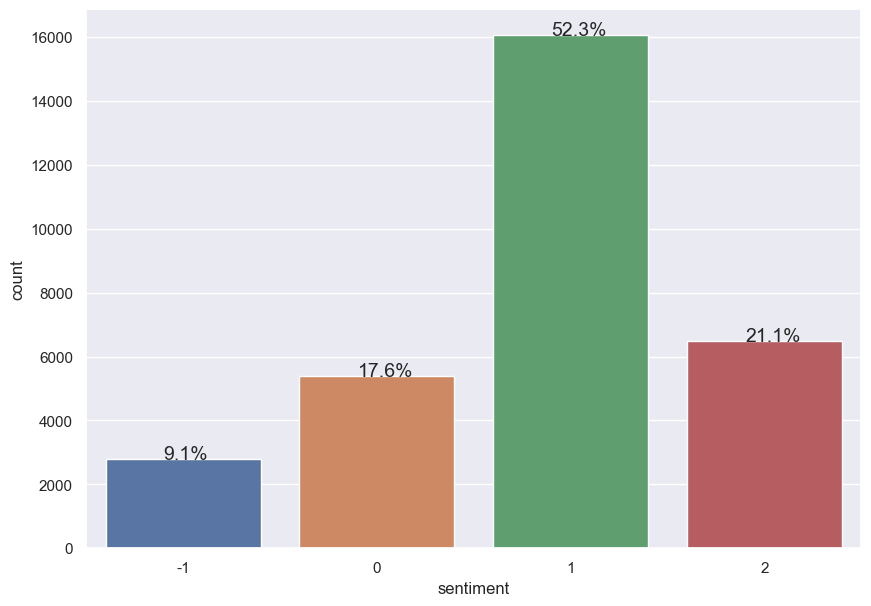

In [21]:
targets = df_train['sentiment']                           # Identify the targets

#Creating a countplot for the features
sns.set(rc={'figure.figsize':(10,7)})
ax=sns.countplot(x=targets, data=df_train)

total = len(targets)                                          # length of the column
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the sentiment
    x = p.get_x() + p.get_width() / 2 - 0.1                   # width of the plot
    y = p.get_y() + p.get_height()                            # heightt of the plot
    ax.annotate(percentage, (x, y), size = 14)                # annotate the percantage 
    
plt.show() # show the plot

In [22]:
#Next we will separate the tweets based on their sentiment.
pro_df = df_train[df_train['sentiment'] == 1]    # Identify the pro sentiment data
anti_df = df_train[df_train['sentiment'] == -1]    # Identify the anti sentiment data
neutral_df = df_train[df_train['sentiment'] == 0]    # Identify the neutral sentiment data
news_df = df_train[df_train['sentiment'] == 2]    # Identify the news sentiment data


In [23]:
# Declare additional stopwords
add_stopwords = ["rt", "http","https"]


The wordcloud above shows the 100 most frequent words used for the 1 Pro sentiment tweets. "Climate" and "change" are the most frequent words but that is to be expected because we have a dataset with tweets about climate change thus we remove those words in order to identify the important words for the specific sentiment. Further we can see that positive words like "believe", "real" and "action" are also frequently used.

The wordcloud above shows the 100 most frequent words used for the -1 Anti sentiment tweets. Here we can see high frequency negative words like, "fake", "hoax" and "scam" is more apparent in tweets with this sentiment.

The wordcloud above shows the 100 most frequent words used for the 0 Neutral sentiment tweets. There is a relative balance between positive and negative words that are used for neutral sentiment.

The wordcloud above shows the 100 most frequent words used for the 2 News sentiment tweets. Here we can see words like, "website", "article" and "report" that points to tweets that reference news sources.

<a id="seven"></a>
# 7. DATA / FEATURE ENGINEERING 
<img src="https://th.bing.com/th/id/R.eee8108c65fc1f3685af3b3016d782b6?rik=NNENRigixm2GFQ&pid=ImgRaw&r=0" style="width: 400px" style="height: 200px;"/>

<a href=#cont>Back to Table of Contents</a>

## 7.1 Processing the Data

In [24]:
#taking a colser look on the message column
df_train['message'] = df_train.message.str.lower()
df_train['message']

0        rt @darreljorstad: funny as hell! canada deman...
1        all the biggest lies about climate change and ...
2        the coming revelation of the $q$global warming...
3        rt @dineshdsouza: let's see if the world ends ...
4        rt @stevesgoddard: obama has no control over t...
                               ...                        
30754    rt @time: the pentagon warned that climate cha...
30755    study finds that global warming exacerbates re...
30756    rt @mikeyslezak: the global green movement pre...
30757    rt @profedwardsnz: nyc mayor says ny will go f...
30758    rt sanders: climate change causes terrorism  h...
Name: message, Length: 30759, dtype: object

In [25]:
#creating a new dataframe for the features
df = pd.DataFrame(df_train['message'])

In [26]:
# Remove Punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
#Data preprocessing
#function that handles the removal punctuations from the tweets
def remove_punct(text):
    """
    the function remove_punction, it takes in a text as input and loops through
    the text, if a character is not in string.punctuation then it adds the character
    as a string to the text variable
    
    """
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

In [28]:
#removes all websites and replaces them with the text 'web-url'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['message_punct'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [29]:
#apply the remove_punct func to the tweets column
df['message_punct'] = df['message_punct'].apply(lambda x: remove_punct(x))
df.head()

,message,message_punct
0,rt @darreljorstad: funny as hell! canada deman...,rt darreljorstad funny as hell canada demands ...
1,all the biggest lies about climate change and ...,all the biggest lies about climate change and ...
2,the coming revelation of the $q$global warming...,the coming revelation of the qglobal warmingq ...
3,rt @dineshdsouza: let's see if the world ends ...,rt dineshdsouza lets see if the world ends whe...
4,rt @stevesgoddard: obama has no control over t...,rt stevesgoddard obama has no control over the...


In [30]:
# Data cleaning 
def clean_data(texts):
    
    """
    clean_data(text), the function further cleans the data using (re)
    by removing extra white spaces and non text characters
    
    """
    words = list()
    for text in texts.split():
        # remove non text character from start and end of string
        text = re.sub(r'(^\W+|\W+$)','',text)
#       #remove multiple white spaces
        text = re.sub(r'\s+','',text)
#       #remove non text characters and emojis between texts
        text = re.sub(r'\W+',r'',text)
#       #remove white space at the end of strings
        text = re.sub(r'\s+$',r'',text)
#       #Remove unwanted symbols
        text = re.sub(r'[#,@,$_,?*//""]',r'',text)
        words.append(text.lower())
            
        text = [i for i in words if len(i) >= 2]
        meaningful_words = [w for w in text if not w in stop]

    return " ".join(meaningful_words)

In [31]:
#applying the clean_data function
df['tweets'] = df['message_punct'].apply(clean_data)

In [32]:
df.head()

,message,message_punct,tweets
0,rt @darreljorstad: funny as hell! canada deman...,rt darreljorstad funny as hell canada demands ...,rt darreljorstad funny hell canada demands gen...
1,all the biggest lies about climate change and ...,all the biggest lies about climate change and ...,biggest lies climate change global warming deb...
2,the coming revelation of the $q$global warming...,the coming revelation of the qglobal warmingq ...,coming revelation qglobal warmingq fraud resem...
3,rt @dineshdsouza: let's see if the world ends ...,rt dineshdsouza lets see if the world ends whe...,rt dineshdsouza lets see world ends realdonald...
4,rt @stevesgoddard: obama has no control over t...,rt stevesgoddard obama has no control over the...,rt stevesgoddard obama control climate worst s...


## Calling the functions for the Stemming and Lemmatization process.
Applying Stemming We wil be using Porter Stemmer to stem the data. Now, for more data processing, we use the following lines of code.

Applying Lemmatization A very similar operation to stemming is called lemmatization. Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

In [33]:
#applying tokenization to the data set
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['tweets'].apply(tokeniser.tokenize)

In [34]:
#applying Lammetization
lemmatizer = WordNetLemmatizer()

In [35]:
#function that handles the process of lemmatization
def extract_lemma(words, lemmatizer):
    return ' '.join([lemmatizer.lemmatize(word) for word in words])   

In [36]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]  ##Notice the use of text.

In [ ]:
#calling extract_lemma function on the tokens column
df['lemma'] = df['tokens'].apply(extract_lemma, args=(lemmatizer, ))

In [38]:
df = df.drop(['message','message_punct','tokens'], axis=1)
df = df.rename(columns={'tweets':'message'})
df.head()

,message
0,rt darreljorstad funny hell canada demands gen...
1,biggest lies climate change global warming deb...
2,coming revelation qglobal warmingq fraud resem...
3,rt dineshdsouza lets see world ends realdonald...
4,rt stevesgoddard obama control climate worst s...


In [39]:
#using countVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english', analyzer='word', ngram_range=(1, 1))

In [40]:
X_count = vectorizer.fit_transform(df['message'].values.astype(str))

## 7.2 Creating Features

In [46]:
X_count

<30759x41426 sparse matrix of type '<class 'numpy.int64'>'
	with 342711 stored elements in Compressed Sparse Row format>

In [47]:
# Extraxt features to help predict the label 
X = X_count

In [48]:
X_count.shape

(30759, 41426)

In [49]:
#pickling the vectorizer of deployment
pickle.dump(vectorizer, open("vect_pickle.pkl", "wb"))

In [50]:
# Determine our Label
y = df_train['sentiment']

In [51]:
y.shape

(30759,)

In [52]:
#selecting the unique labels
type_labels = list(df_train['sentiment'].unique())
type_labels

[-1, 0, 1, 2]

In [53]:
#selecting the size of the labels
heights = list(df_train['sentiment'].value_counts())
bars = pd.DataFrame(zip(heights,type_labels), columns=['heights','labels'])
bars = bars.sort_values(by='heights',ascending=True)

## 7.3 Balancing data

### Class imbalances
As we can see from the distrubution plot above there are inbalances in the datasaet. Below we will attempt to correct the imbalances in the data by resampling.

In [54]:
#selcting a class size which is roughly the size of labe 2 class
class_size =3500

In [55]:
X = X_count.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
# Determine our Label
y

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
30754    2
30755    2
30756    2
30757    2
30758    2
Name: sentiment, Length: 30759, dtype: int64

In [57]:
# concatenate both features and labels before resampling
data = np.concatenate([X, y[:,np.newaxis]], axis=1)
data

array([[ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0, -1],
       ...,
       [ 0,  0,  0, ...,  0,  0,  2],
       [ 0,  0,  0, ...,  0,  0,  2],
       [ 0,  0,  0, ...,  0,  0,  2]], dtype=int64)

In [58]:
#setting the index of the dataframe as labels
bar_label_df = bars.set_index('labels')
bar_label_df

,heights
labels,
2,2793
1,5400
0,6493
-1,16073


In [60]:
resampled_classes = []

# For each label
for label in range(-1,3):
    # Get num. of observations from this class
    label_size = bar_label_df.loc[label]['heights']
     
    # If label_size < class size the upsample, else downsample
    if label_size < class_size:
        # Upsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=True, # sample with replacement (we need to duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
    else:
        # Downsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=True, # sample without replacement (no need for duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
        
    resampled_classes.append(label_resampled)

In [61]:
#concatenating the resample classes
resampled_data = np.concatenate(resampled_classes, axis=0)

In [62]:
resampled_data.shape

(14000, 41427)

In [63]:
#Split resampled data into X and y
X_resampled = resampled_data[:,:-1]
y_resampled = resampled_data[:,-1]

In [64]:
y_resampled

array([-1, -1, -1, ...,  2,  2,  2], dtype=int64)

Next the team decide to create a test dataframe as test_without_labels will be used for validation

In [65]:
#creating a test dataframe
test_df = pd.DataFrame(df_test['message'])

In [66]:
test_df.head()

,message
0,RT @darreljorstad: Funny as hell! Canada deman...
1,All the biggest lies about climate change and ...
2,The Coming Revelation Of The $q$Global Warming...
3,RT @DineshDSouza: Let's see if the world ends ...
4,RT @SteveSGoddard: Obama has no control over t...


In [67]:
#removing http and replacing it with url pattern
test_df['message_punct'] = test_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [68]:
#applying the remove punctuation funtion to the test data
test_df['message_punct'] = test_df['message_punct'].apply(lambda x: remove_punct(x))

In [69]:
#apply the clean_data function
test_df['tweets'] = test_df['message_punct'].apply(clean_data)

In [70]:
#transforming the data using vectorizer
test_count = vectorizer.transform(test_df['tweets'].values.astype(str))

In [71]:
#selecting the feature
x_test = test_count

In [72]:
#the shape of the feature
x_test.shape

(30759, 41426)

In [73]:
X_resampled.shape

(14000, 41426)

<a id="eight"></a>
# 8. MODELLING 
<img src= "https://miro.medium.com/max/2266/0*ksi8J5RL7iPyoV_x.jpg" style="width: 300px" style="height: 300px;"/>

<a href=#cont>Back to Table of Contents</a>

In [57]:
# Create some Classification models to Predict an individual’s belief in climate change based on their tweets!

In [74]:
# Split Data (into Training & Test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [75]:
# Initializing our models for fitting
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [76]:
ridge = RidgeClassifier()

In [77]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
#fitting the models 
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

In [82]:
ridge.fit(X_train, y_train)

In [62]:
# Generate predictions
pred1 = lr.predict(X_test)
pred2 = dt.predict(X_test)
pred3 = rf.predict(X_test)
pred4 = xgb.predict(X_test)

In [72]:
pred4 = ridge.predict(X_test)

In [58]:
f1_score?

In [63]:
# Checking f1 scores
score1 = f1_score(y_test, pred1, average=None)
score2 = f1_score(y_test, pred2, average=None)
score3 = f1_score(y_test, pred3, average=None)

In [73]:
score4 = f1_score(y_test, pred4, average=None)

In [64]:
score1.mean()

0.81700639725298

In [65]:
score2.mean()

0.7680897348981597

In [66]:
score3.mean()

0.8098834229176942

In [74]:
score4.mean()

0.8081071838741057

In [67]:
pickle.dump(lr, open("logistic.pkl", "wb"))
pickle.dump(dt, open("dec_tree.pkl", "wb"))
pickle.dump(rf, open("rand_for.pkl", "wb"))

In [77]:
pickle.dump(ridge, open("ridge.pkl", "wb"))

In [88]:
log_reg = lr.predict(x_test)
decision_tree = dt.predict(x_test)
random_forest = rf.predict(x_test)
ridgeclass = ridge.predict(x_test)
xgboost = xgb.predict(x_test)

In [128]:
df1 = test.copy()
df2 = test.copy()
df3 = test.copy()
df4 = test.copy()

In [131]:
df1 = df1.drop(['message'], axis=1)
df2 = df2.drop(['message'], axis=1)
df3 = df3.drop(['message'], axis=1)
df4 = df4.drop(['message'], axis=1)

In [132]:
df1['sentiment'] = log_reg
df2['sentiment'] = decision_tree
df3['sentiment'] = random_forest
df4['sentiment'] = ridgeclass

In [133]:
df1.head()

,tweetid,sentiment
0,169760,2
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [134]:
df2.head()

,tweetid,sentiment
0,169760,2
1,35326,0
2,224985,2
3,476263,0
4,872928,0


In [135]:
df3.head()

,tweetid,sentiment
0,169760,2
1,35326,2
2,224985,2
3,476263,1
4,872928,0


In [136]:
df4.head()

,tweetid,sentiment
0,169760,2
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [110]:
a = ['I belive in climate change and I think it should be taken seriously']
b = pd.DataFrame({'msg':a})
b

,msg
0,I belive in climate change and I think it shou...


In [111]:
c = vectorizer.transform(b['msg'].values.astype(str))

In [112]:
c.shape

(1, 24020)

In [125]:
predd = lr.predict(c)
predd

array([1], dtype=int64)

In [116]:
d = ['climate change is a lie. Our nature is not changing']
e = pd.DataFrame({'msg':d})
e

,msg
0,climate change is a lie. Our nature is not cha...


In [117]:
f = vectorizer.transform(e['msg'].values.astype(str))
f.shape

(1, 24020)

In [124]:
predd2 = ridge.predict(c)
predd2

array([1], dtype=int64)

In [138]:
df1.to_csv('nm2_submission_rid1.csv', index=False)
df2.to_csv('nm2_submission_rid2.csv', index=False)
df3.to_csv('nm2_submission_rid3.csv', index=False)
df4.to_csv('nm2_submission_rid4.csv', index=False)

<a id="nine"></a>
# 9. MODEL PERFORMANCE

<a href=#cont>Back to Table of Contents</a>

<a id="ten"></a>
# 10. MODEL EVALUATION <img src="https://miro.medium.com/max/1200/1*59SfOBEuJ3m0KC7r5SshBQ.png" style="width: 400px" style="height: 200px;"/>

<a href=#cont>Back to Table of Contents</a>

In [58]:
# Compare Model performance and comment on what the best model is and why

<a id="eleven"></a>
# 11. CONCLUSION <img src="https://th.bing.com/th/id/OIP.XdnlyDaqwfcI_Ey2qJ6rDAHaE7?pid=ImgDet&rs=1" style="width: 500px;"/> 

<a href=#cont>Back to Table of Contents</a>

In [59]:
#write conclusions

<a id="twelve"></a>
# 12. REFERENCES <img src="https://th.bing.com/th/id/R.07a0f66e06508a8948b9abf7c411eaa7?rik=ODoRu5YYdY7fww&pid=ImgRaw&r=0" style="width:250px;"/>

<a href=#cont>Back to Table of Contents</a>

In [ ]:
#Our references are:

<img src="https://th.bing.com/th/id/OIP.LiQ4RysTzqgc1q78F3ncoAHaFj?pid=ImgDet&rs=1" style="width:450px;"/>